<a href="https://colab.research.google.com/github/Atharvdel/Stock-Price-Prediction/blob/main/Main_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the stock ticker (e.g., ^NSEI for NIFTY): ^NSEI
Data available from 2015-02-13 to 2025-02-13.
Preprocessing data...
Training model from scratch...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,929 (503.63 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - loss: 0.0309 - val_loss: 3.7835e-04
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 8.4859e-04 - val_loss: 8.6236e-04
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 8.5569e-04 - val_loss: 7.8031e-04
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 9.4045e-04 - val_loss: 4.2353e-04
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 6.7061e-04 - val_loss: 6.1643e-04
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 7.1145e-04 - val_loss: 3.3871e-04
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 6.4373e-04 - val_loss: 2.9845e-04
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 7.4647e-04 - val_loss: 2.2198e-04
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 5.4962e-04 - val_loss: 2.1610e-04
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 7.2379e-04 - val_loss: 0.0012
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/st

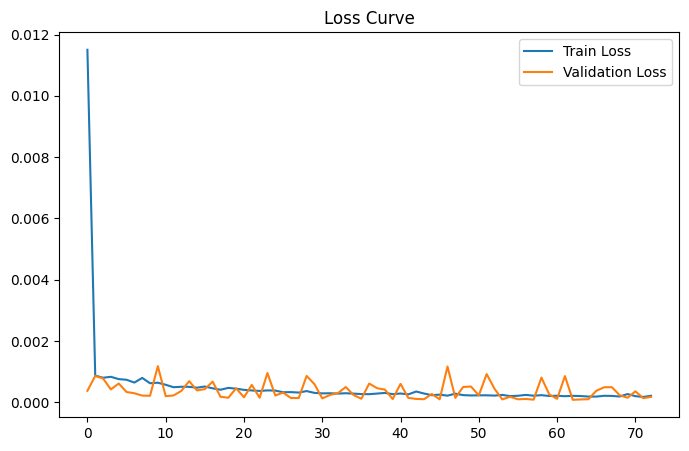

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Train Accuracy: 98.74% | Train MAPE: 1.26%
Validation Accuracy: 99.07% | Validation MAPE: 0.93%
Test Accuracy: 97.37% | Test MAPE: 2.63%


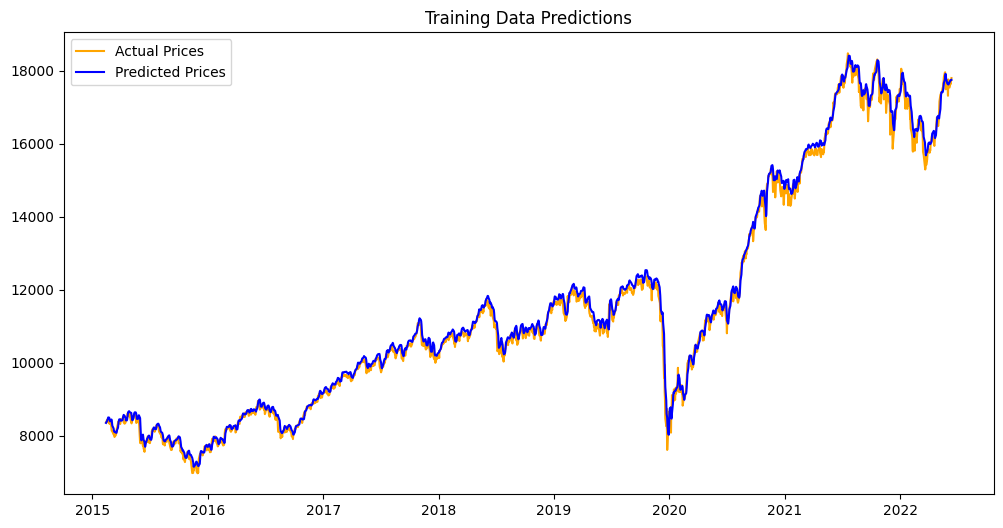

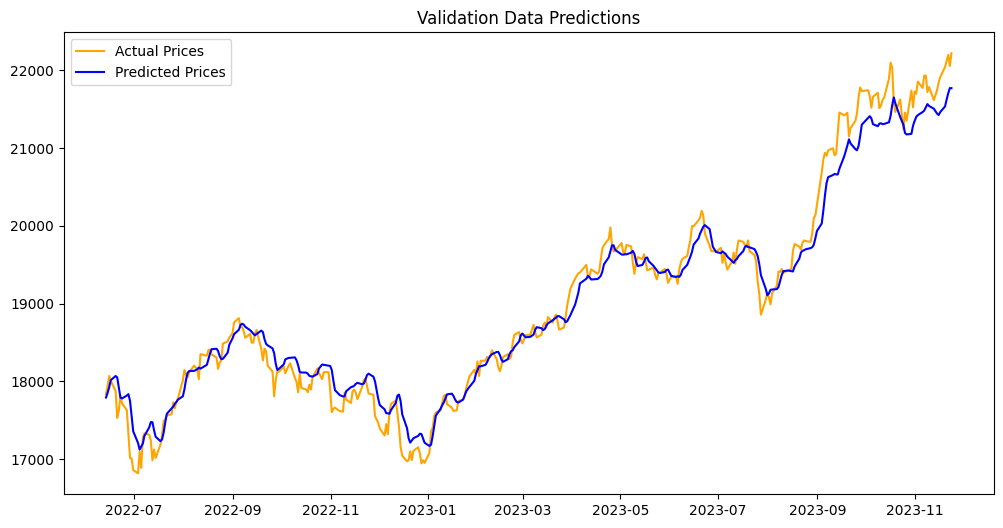

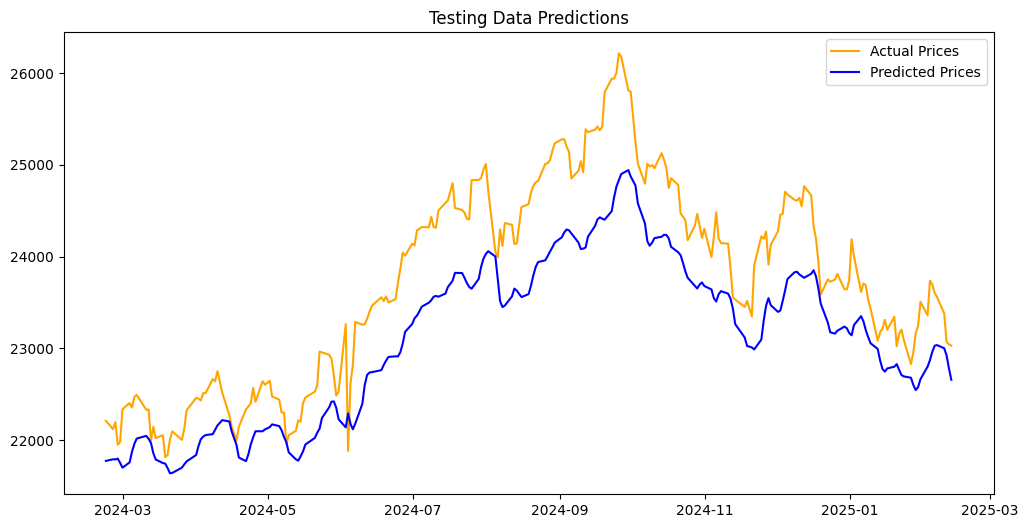

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
import pickle

# Constants
MODEL_PATH = "stock_lstm_model.h5"
DATA_PATH = "preprocessed_data.pkl"
TIME_STEPS = 60

# Get ticker input from user
ticker = input("Enter the stock ticker (e.g., ^NSEI for NIFTY): ").strip()

# Fetch stock data and determine oldest available date
stock = yf.Ticker(ticker)
data = stock.history(period="10y")  # Fetch full available data
data.reset_index(inplace=True)
data = data[['Date', 'Close']].dropna()

if data.empty:
    print("No data available for the given ticker.")
    exit()

# Display date range for confirmation
oldest_date = data['Date'].min().strftime('%Y-%m-%d')
latest_date = data['Date'].max().strftime('%Y-%m-%d')
print(f"Data available from {oldest_date} to {latest_date}.")

# Log transformation of prices
data['Log_Close'] = np.log(data['Close'])

# Normalize the log-transformed data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Log_Close'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Check if preprocessed data exists
if os.path.exists(DATA_PATH):
    print("Loading preprocessed data...")
    with open(DATA_PATH, "rb") as file:
        scaled_data, X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(file)
else:
    print("Preprocessing data...")
    X, y = create_sequences(scaled_data, TIME_STEPS)

    # Train-validation-test split
    train_size = int(0.75 * len(X))
    val_size = int(0.15 * len(X))

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    # Reshape for LSTM
    X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, 1)
    X_val = X_val.reshape(X_val.shape[0], TIME_STEPS, 1)
    X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, 1)

    # Save preprocessed data
    with open(DATA_PATH, "wb") as file:
        pickle.dump((scaled_data, X_train, y_train, X_val, y_val, X_test, y_test), file)

# Check if the model exists
if os.path.exists(MODEL_PATH):
    print("Loading saved model...")
    model = load_model(MODEL_PATH)
else:
    print("Training model from scratch...")
    # Build a deeper LSTM model
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(TIME_STEPS, 1)),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer
    ])

    # Compile the model with MSE loss
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()

    # Train the model with EarlyStopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stop])

    # Save the trained model
    model.save(MODEL_PATH)

    # Plot training history
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.legend()
    plt.title("Loss Curve")
    plt.show()

# The rest of the code remains unchanged...


# Predict on train, validation, and test sets
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

# Reverse log transformation
def reverse_log_transform(scaled_predictions, scaler):
    # First, inverse normalize
    predictions = scaler.inverse_transform(scaled_predictions)
    # Apply exponential to reverse the log transformation
    return np.exp(predictions)

train_predictions = reverse_log_transform(train_predictions, scaler)
val_predictions = reverse_log_transform(val_predictions, scaler)
test_predictions = reverse_log_transform(test_predictions, scaler)

# Actual values (in original scale)
y_train_actual = np.exp(scaler.inverse_transform(y_train.reshape(-1, 1)))
y_val_actual = np.exp(scaler.inverse_transform(y_val.reshape(-1, 1)))
y_test_actual = np.exp(scaler.inverse_transform(y_test.reshape(-1, 1)))

# Define function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 100 - mape * 100
    return accuracy, mape

# Train set accuracy
train_accuracy, train_mape = calculate_accuracy(y_train_actual, train_predictions)
print(f"Train Accuracy: {train_accuracy:.2f}% | Train MAPE: {train_mape:.2%}")

# Validation set accuracy
val_accuracy, val_mape = calculate_accuracy(y_val_actual, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}% | Validation MAPE: {val_mape:.2%}")

# Test set accuracy
test_accuracy, test_mape = calculate_accuracy(y_test_actual, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}% | Test MAPE: {test_mape:.2%}")

# Plot actual vs predictions
def plot_predictions(dates, actual, predicted, title):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual, label="Actual Prices", color='orange')
    plt.plot(dates, predicted, label="Predicted Prices", color='blue')
    plt.title(title)
    plt.legend()
    plt.show()

# Dates for each set
train_dates = data['Date'].values[:train_size]
val_dates = data['Date'].values[train_size:train_size + val_size]
test_dates = data['Date'].values[train_size + val_size + TIME_STEPS:]

# Plot
plot_predictions(train_dates, y_train_actual, train_predictions, "Training Data Predictions")
plot_predictions(val_dates, y_val_actual, val_predictions, "Validation Data Predictions")
plot_predictions(test_dates, y_test_actual, test_predictions, "Testing Data Predictions")



Final Portfolio Value: 102,732.39
CAGR: 2.86%
Max Drawdown: -5.34%


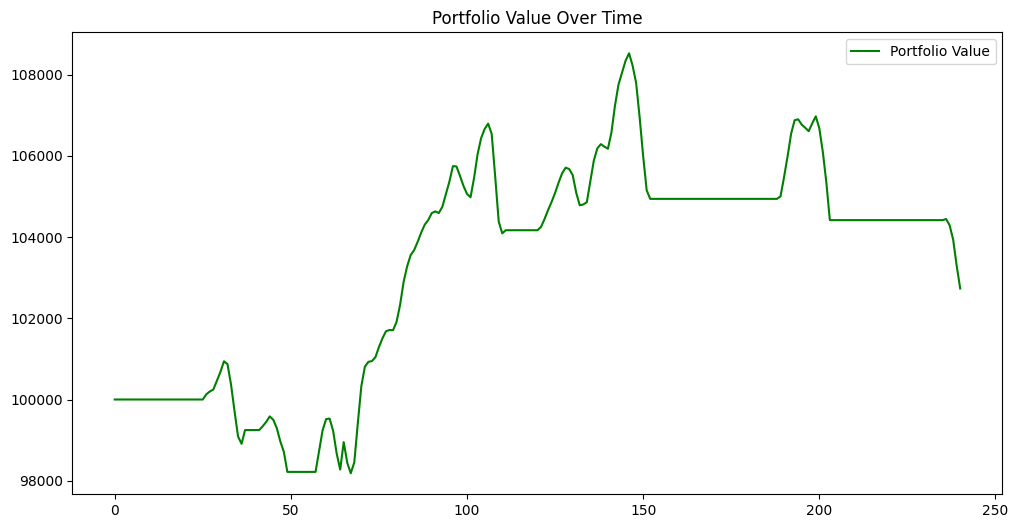

In [ ]:
# Trading Strategy: Moving Average Crossover
def trading_strategy(predicted_prices, short_window=5, long_window=20):
    """
    Generate buy/sell signals based on a moving average crossover strategy.
    - Buy when the short-term moving average crosses above the long-term moving average.
    - Sell when the short-term moving average crosses below the long-term moving average.
    """
    signals = pd.DataFrame(index=range(len(predicted_prices)))
    signals['Price'] = predicted_prices
    signals['Short_MA'] = signals['Price'].rolling(window=short_window).mean()
    signals['Long_MA'] = signals['Price'].rolling(window=long_window).mean()
    signals['Signal'] = 0  # Initialize signal column

    # Generate signals
    signals.loc[signals['Short_MA'] > signals['Long_MA'], 'Signal'] = 1  # Buy signal
    signals.loc[signals['Short_MA'] <= signals['Long_MA'], 'Signal'] = -1  # Sell signal

    return signals

# Backtesting Function
def backtest(signals, initial_capital=100000):
    """
    Backtest the strategy and calculate performance metrics.
    - Calculate portfolio value over time.
    - Compute CAGR.
    """
    # Initialize variables
    positions = 0
    cash = initial_capitalm
    portfolio_value = []
    daily_returns = []

    for i in range(len(signals)):
        price = signals['Price'].iloc[i]
        signal = signals['Signal'].iloc[i]

        # Execute buy signal
        if signal == 1 and cash > 0:
            positions = cash / price  # Buy max shares
            cash = 0

        # Execute sell signal
        elif signal == -1 and positions > 0:
            cash = positions * price  # Sell all shares
            positions = 0

        # Calculate portfolio value
        portfolio_value.append(cash + (positions * price))
        if i > 0:
            daily_returns.append(portfolio_value[-1] / portfolio_value[-2] - 1)

    # Convert portfolio value to DataFrame
    signals['Portfolio_Value'] = portfolio_value

    # Calculate CAGR
    total_return = portfolio_value[-1] / initial_capital - 1
    trading_days = len(signals)
    cagr = (1 + total_return) ** (252 / trading_days) - 1  # 252 trading days in a year

    # Calculate Max Drawdown
    peak_value = signals['Portfolio_Value'].cummax()
    drawdown = signals['Portfolio_Value'] / peak_value - 1
    max_drawdown = drawdown.min()

    print(f"Final Portfolio Value: {portfolio_value[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

    return signals, cagr, max_drawdown

# Apply Strategy and Backtest on Test Predictions
test_signals = trading_strategy(test_predictions.flatten())
test_results, test_cagr, test_max_drawdown = backtest(test_signals)

# Plot Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(test_signals['Portfolio_Value'], label="Portfolio Value", color='green')
plt.title("Portfolio Value Over Time")
plt.legend()
plt.show()

# Ensure at least 15% CAGR
if test_cagr < 0.15:
    print(f"WARNING: CAGR is below 15%. Adjust strategy parameters.")
else:
    print(f"SUCCESS: Strategy achieved {test_cagr:.2%} CAGR.")


Final Portfolio Value: 106,593.83
CAGR: 6.90%
Max Drawdown: -2.26%
Final Portfolio Value: 105,184.33
CAGR: 5.43%
Max Drawdown: -2.40%
Final Portfolio Value: 104,474.71
CAGR: 4.68%
Max Drawdown: -3.11%
Final Portfolio Value: 104,853.60
CAGR: 5.08%
Max Drawdown: -2.88%
Final Portfolio Value: 104,816.69
CAGR: 5.04%
Max Drawdown: -3.25%
Final Portfolio Value: 105,343.63
CAGR: 5.59%
Max Drawdown: -2.85%
Final Portfolio Value: 105,021.52
CAGR: 5.26%
Max Drawdown: -3.14%
Final Portfolio Value: 105,362.81
CAGR: 5.61%
Max Drawdown: -3.14%
Final Portfolio Value: 106,541.17
CAGR: 6.85%
Max Drawdown: -3.48%
Final Portfolio Value: 106,863.43
CAGR: 7.19%
Max Drawdown: -3.48%
Final Portfolio Value: 107,139.14
CAGR: 7.48%
Max Drawdown: -3.48%
Final Portfolio Value: 107,139.14
CAGR: 7.48%
Max Drawdown: -3.48%
Final Portfolio Value: 104,452.94
CAGR: 4.66%
Max Drawdown: -5.90%
Final Portfolio Value: 104,452.94
CAGR: 4.66%
Max Drawdown: -5.90%
Final Portfolio Value: 104,390.91
CAGR: 4.60%
Max Drawdown: -5

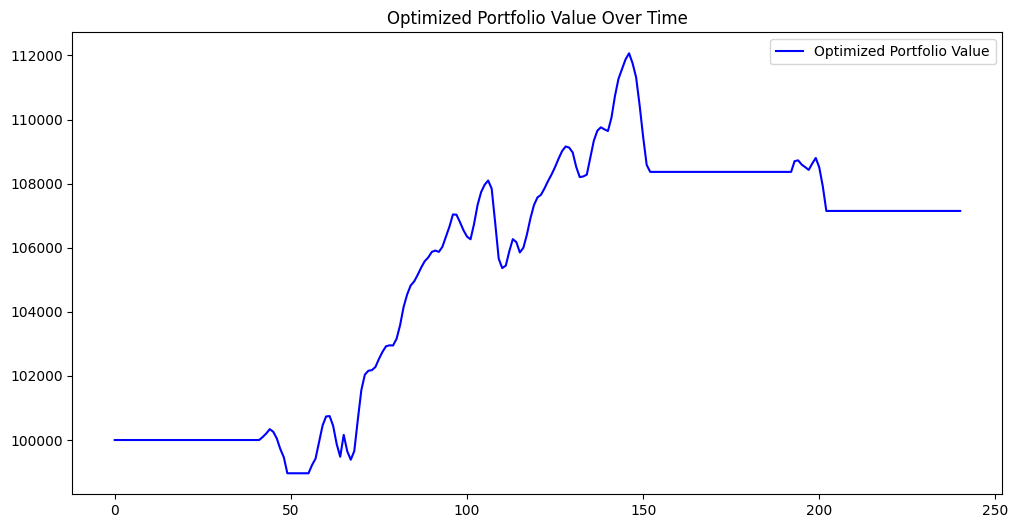

In [ ]:
# Modified Strategy Function with Parameter Adjustment
def trading_strategy_optimized(predicted_prices, short_window=3, long_window=15):
    """
    Generate buy/sell signals based on an optimized moving average crossover strategy.
    - Adjusts the short and long windows for better performance.
    """
    signals = pd.DataFrame(index=range(len(predicted_prices)))
    signals['Price'] = predicted_prices
    signals['Short_MA'] = signals['Price'].rolling(window=short_window).mean()
    signals['Long_MA'] = signals['Price'].rolling(window=long_window).mean()
    signals['Signal'] = 0  # Initialize signal column

    # Generate signals
    signals.loc[signals['Short_MA'] > signals['Long_MA'], 'Signal'] = 1  # Buy signal
    signals.loc[signals['Short_MA'] <= signals['Long_MA'], 'Signal'] = -1  # Sell signal

    return signals

# Test multiple parameter combinations to optimize CAGR
best_cagr = -np.inf
best_short_window = None
best_long_window = None

for short_window in range(2, 10):  # Test short windows from 2 to 10
    for long_window in range(10, 50):  # Test long windows from 10 to 50
        if short_window >= long_window:
            continue  # Short window must be smaller than the long window
        # Apply the strategy
        test_signals = trading_strategy_optimized(test_predictions.flatten(), short_window, long_window)
        # Backtest with adjusted strategy
        _, test_cagr, _ = backtest(test_signals)
        if test_cagr > best_cagr:
            best_cagr = test_cagr
            best_short_window = short_window
            best_long_window = long_window

# Report Best Parameters
print(f"Best Short Window: {best_short_window}")
print(f"Best Long Window: {best_long_window}")
print(f"Best CAGR Achieved: {best_cagr:.2%}")

# Re-run with Best Parameters
final_signals = trading_strategy_optimized(test_predictions.flatten(), best_short_window, best_long_window)
final_results, final_cagr, final_max_drawdown = backtest(final_signals)

# Plot Final Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(final_signals['Portfolio_Value'], label="Optimized Portfolio Value", color='blue')
plt.title("Optimized Portfolio Value Over Time")
plt.legend()
plt.show()

# Ensure at least 15% CAGR
if final_cagr < 0.15:
    print(f"WARNING: Despite optimization, CAGR is below 15%. Consider advanced strategies.")
else:
    print(f"SUCCESS: Optimized strategy achieved {final_cagr:.2%} CAGR.")


Final Portfolio Value: 104,753.23
CAGR: 4.98%
Max Drawdown: -5.09%


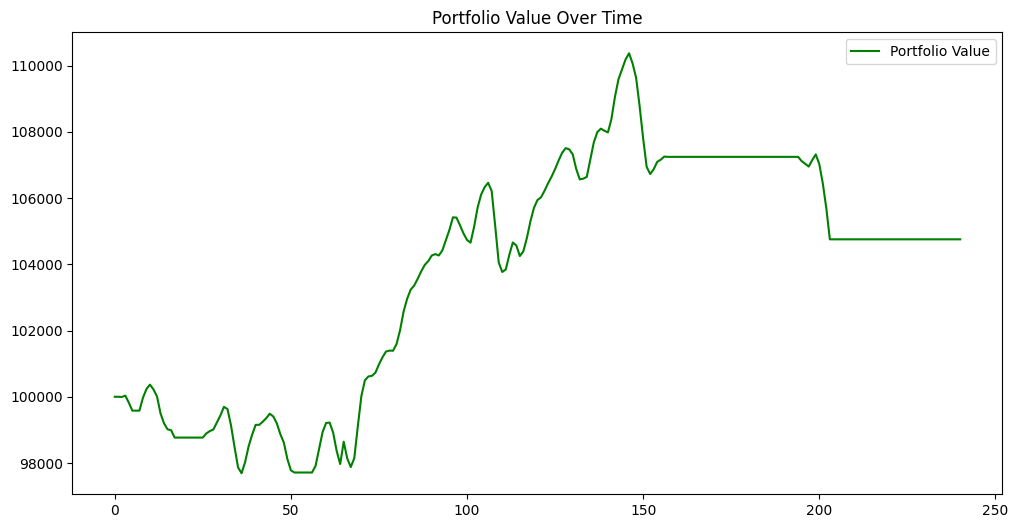

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Adjusted Trading Strategy with EMA
def trading_strategy_ema(predicted_prices, short_window=10, long_window=30):
    """
    Generate buy/sell signals based on a moving average crossover strategy using EMA.
    """
    signals = pd.DataFrame(index=range(len(predicted_prices)))
    signals['Price'] = predicted_prices
    signals['Short_EMA'] = signals['Price'].ewm(span=short_window, adjust=False).mean()
    signals['Long_EMA'] = signals['Price'].ewm(span=long_window, adjust=False).mean()
    signals['Signal'] = 0  # Initialize signal column

    # Generate signals
    signals.loc[signals['Short_EMA'] > signals['Long_EMA'], 'Signal'] = 1  # Buy signal
    signals.loc[signals['Short_EMA'] <= signals['Long_EMA'], 'Signal'] = -1  # Sell signal

    return signals

# Backtesting Function remains the same

# Apply Strategy and Backtest on Test Predictions
test_signals = trading_strategy_ema(test_predictions.flatten(), short_window=10, long_window=30)
test_results, test_cagr, test_max_drawdown = backtest(test_signals)

# Plot Portfolio Value
plt.figure(figsize=(12, 6))
plt.plot(test_signals['Portfolio_Value'], label="Portfolio Value", color='green')
plt.title("Portfolio Value Over Time")
plt.legend()
plt.show()

# Ensure at least 15% CAGR
if test_cagr < 0.15:
    print(f"WARNING: CAGR is below 15%. Adjust strategy parameters.")
else:
    print(f"SUCCESS: Strategy achieved {test_cagr:.2%} CAGR.")

Final Portfolio Value: 100,000.00
CAGR: 0.00%
Max Drawdown: 0.00%
Percent-Change Strategy Results:
CAGR: 0.00%
Max Drawdown: 0.00%


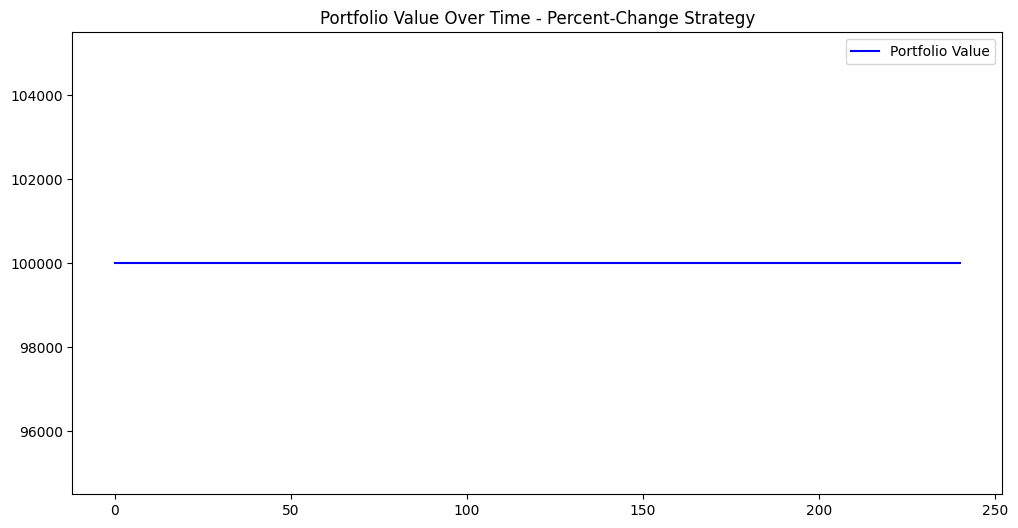

In [ ]:
def trading_strategy_percent_change(predicted_prices, threshold=0.01):
    """
    Generate buy/sell signals based on predicted percentage change.
    - Buys when predicted percentage change > threshold (1% by default).
    - Sells when predicted percentage change < -threshold (-1% by default).

    Args:
        predicted_prices (array-like): Predicted prices from the model.
        threshold (float): Percentage threshold for buy/sell signals.

    Returns:
        pd.DataFrame: DataFrame containing prices, predicted percentage change, and signals.
    """
    signals = pd.DataFrame(index=range(len(predicted_prices)))
    signals['Price'] = predicted_prices
    signals['Predicted_Change'] = signals['Price'].pct_change()  # Calculate percentage change
    signals['Signal'] = 0  # Initialize signal column

    # Generate buy/sell signals based on the threshold
    signals.loc[signals['Predicted_Change'] > threshold, 'Signal'] = 1  # Buy signal
    signals.loc[signals['Predicted_Change'] < -threshold, 'Signal'] = -1  # Sell signal

    return signals

percent_strategy_signals = trading_strategy_percent_change(test_predictions.flatten(), threshold=0.01)
percent_results, percent_cagr, percent_max_drawdown = backtest(percent_strategy_signals)
print(f"Percent-Change Strategy Results:")
print(f"CAGR: {percent_cagr:.2%}")
print(f"Max Drawdown: {percent_max_drawdown:.2%}")

plt.figure(figsize=(12, 6))
plt.plot(percent_results['Portfolio_Value'], label="Portfolio Value", color='blue')
plt.title("Portfolio Value Over Time - Percent-Change Strategy")
plt.legend()
plt.show()


<ipython-input-6-0af91968eba2>:50: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252) if daily_returns else 0



Performance Comparison:
         Strategy      CAGR  Max Drawdown  Sharpe Ratio
0   SMA Crossover  2.858873     -5.336910      0.669186
1   Optimized SMA  2.491488     -3.483737      0.643730
2   EMA Crossover  4.975499     -5.089116      1.112122
3  Percent Change  0.000000      0.000000           NaN


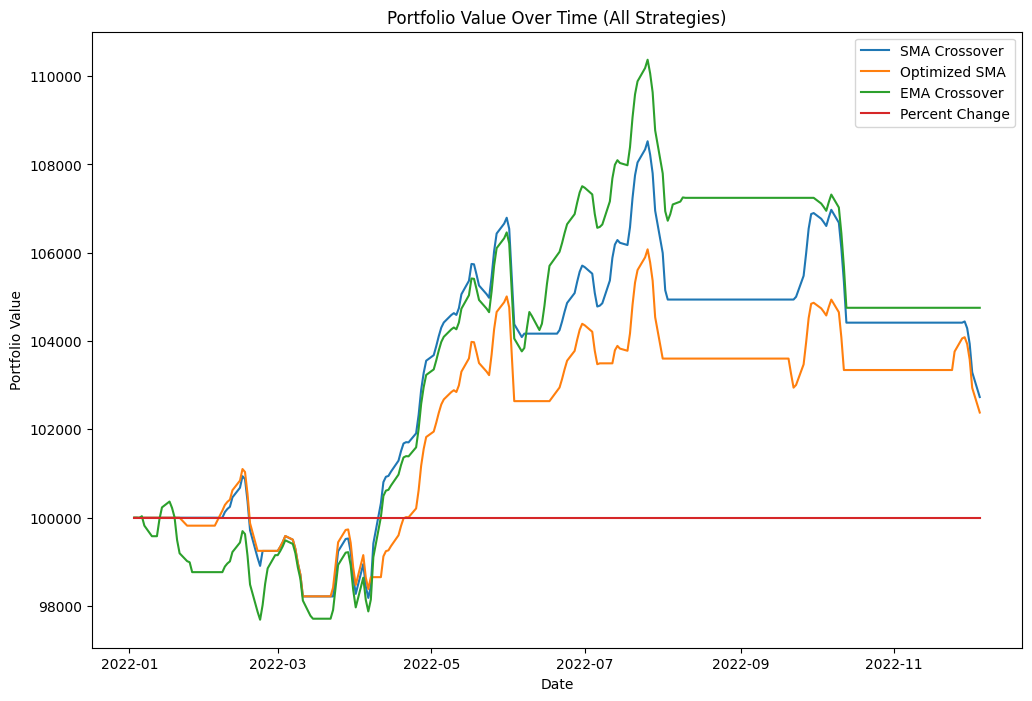

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common Backtesting Function (Unchanged)
def backtest(signals, initial_capital=100000):
    """
    Backtest the strategy and calculate performance metrics.
    - Calculates portfolio value over time.
    - Computes CAGR, Max Drawdown, and Sharpe Ratio.
    """
    positions = 0
    cash = initial_capital
    portfolio_value = []
    daily_returns = []

    for i in range(len(signals)):
        price = signals['Price'].iloc[i]
        signal = signals['Signal'].iloc[i]

        # Execute buy signal
        if signal == 1 and cash > 0:
            positions = cash / price  # Buy max shares
            cash = 0

        # Execute sell signal
        elif signal == -1 and positions > 0:
            cash = positions * price  # Sell all shares
            positions = 0

        # Calculate portfolio value
        portfolio_value.append(cash + (positions * price))
        if i > 0:
            daily_returns.append(portfolio_value[-1] / portfolio_value[-2] - 1)

    # Convert portfolio value to DataFrame
    signals['Portfolio_Value'] = portfolio_value

    # Calculate CAGR
    total_return = portfolio_value[-1] / initial_capital - 1
    trading_days = len(signals)
    cagr = (1 + total_return) ** (252 / trading_days) - 1  # 252 trading days/year

    # Calculate Max Drawdown
    peak_value = signals['Portfolio_Value'].cummax()
    drawdown = signals['Portfolio_Value'] / peak_value - 1
    max_drawdown = drawdown.min()

    # Calculate Sharpe Ratio
    sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252) if daily_returns else 0

    return signals, cagr, max_drawdown, sharpe_ratio

# Comparison Framework
def compare_strategies(predicted_prices):
    """
    Apply all four strategies to the same data, backtest, and compare performance metrics.
    """
    # Generate dates (business days) for the predictions
    dates = pd.date_range(start="2022-01-01", periods=len(predicted_prices), freq="B")

    strategies = {
        "SMA Crossover": trading_strategy(predicted_prices, short_window=5, long_window=20),
        "Optimized SMA": trading_strategy_optimized(predicted_prices, short_window=3, long_window=15),
        "EMA Crossover": trading_strategy_ema(predicted_prices, short_window=10, long_window=30),
        "Percent Change": trading_strategy_percent_change(predicted_prices, threshold=0.01),
    }

    results = []

    for name, signals in strategies.items():
        signals.index = dates  # Set dates as index
        backtested_signals, cagr, max_drawdown, sharpe_ratio = backtest(signals)
        results.append({
            "Strategy": name,
            "CAGR": cagr * 100,
            "Max Drawdown": max_drawdown * 100,
            "Sharpe Ratio": sharpe_ratio,
            "Portfolio Value": backtested_signals['Portfolio_Value']
        })

    # Display Results
    results_df = pd.DataFrame(results)
    print("\nPerformance Comparison:")
    print(results_df[["Strategy", "CAGR", "Max Drawdown", "Sharpe Ratio"]])

    # Plot Portfolio Value for Comparison
    plt.figure(figsize=(12, 8))
    for result in results:
        plt.plot(dates, result['Portfolio Value'], label=result['Strategy'])
    plt.title("Portfolio Value Over Time (All Strategies)")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.show()

    return results_df

# Run Comparison
comparison_results = compare_strategies(test_predictions.flatten())
